<b>Exploring eBay Car Sales Data</b><br>
The aim of this project is to clean the data and analyze the included used car listings. <br>
We will be working with a modified dataset of used car from German eBay website that was originally scraped and uploaded to Kaggle by orgesleka.

In [7]:
#importing packages
import pandas as pd
from prettytable import PrettyTable as pt
import re
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

In [8]:
#read csv file
ebay = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [9]:
#Viewing the columns and looking for null data points
print(ebay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [10]:
#Columns and their descriptions
coltable = pt(['Column Name','Description'])
# Adding rows
coltable.add_row(["dateCrawled", "Date when the ad was crawled"])
coltable.add_row(["name", "Name of car"])
coltable.add_row(["seller", "Whether seller is private or dealer"])
coltable.add_row(["offertype", "Type of listing"])
coltable.add_row(["price", "Price of car in the ad"])
coltable.add_row(["abtest", "Whether listing is included in A/B test"])
coltable.add_row(["vehicleType", "Vehicle type"])
coltable.add_row(["yearOfRegistration", "year that the car was first registered"])
coltable.add_row(["gearbox", "Transmission Type"])
coltable.add_row(["powerPS", "Power of the car in PS"])
coltable.add_row(["model", "Car model name"])
coltable.add_row(["kilometer", "How many km that the car has driven"])
coltable.add_row(["monthofResgistration", "Month that the car was first registered"])
coltable.add_row(["fuelType", "Type of fuel the car uses"])
coltable.add_row(["brand", "Car brand"])
coltable.add_row(["notRepairedDamage", "Whether car have unrepaired damages"])
coltable.add_row(["dateCreated", "Date of creation for the eBay listing"])
coltable.add_row(["nrOfPictures", "Number of pictures in the ad"])
coltable.add_row(["postalCode", "Postal code of the location of the vehicle"])
coltable.add_row(["lastSeenOnline", "The last time crawler saw the ad online"])

print(coltable)

+----------------------+--------------------------------------------+
|     Column Name      |                Description                 |
+----------------------+--------------------------------------------+
|     dateCrawled      |        Date when the ad was crawled        |
|         name         |                Name of car                 |
|        seller        |    Whether seller is private or dealer     |
|      offertype       |              Type of listing               |
|        price         |           Price of car in the ad           |
|        abtest        |  Whether listing is included in A/B test   |
|     vehicleType      |                Vehicle type                |
|  yearOfRegistration  |   year that the car was first registered   |
|       gearbox        |             Transmission Type              |
|       powerPS        |           Power of the car in PS           |
|        model         |               Car model name               |
|      kilometer    

In [11]:
colname = ebay.columns
print(colname)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [12]:
#since the columns name are in camelcase, we will change it to snakecase for easy reading
snakecasename = []
for x in colname:
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower()
    snakecasename.append(name)

print(snakecasename)

['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest', 'vehicle_type', 'year_of_registration', 'gearbox', 'power_p_s', 'model', 'kilometer', 'month_of_registration', 'fuel_type', 'brand', 'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code', 'last_seen']


In [13]:
#change the name for powerPS then update the column names
snakecasename[9] = 'power_ps'
ebay.columns = snakecasename

In [14]:
print(ebay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date_crawled           371528 non-null  object
 1   name                   371528 non-null  object
 2   seller                 371528 non-null  object
 3   offer_type             371528 non-null  object
 4   price                  371528 non-null  int64 
 5   abtest                 371528 non-null  object
 6   vehicle_type           333659 non-null  object
 7   year_of_registration   371528 non-null  int64 
 8   gearbox                351319 non-null  object
 9   power_ps               371528 non-null  int64 
 10  model                  351044 non-null  object
 11  kilometer              371528 non-null  int64 
 12  month_of_registration  371528 non-null  int64 
 13  fuel_type              338142 non-null  object
 14  brand                  371528 non-null  object
 15  

Data Exploration

In [15]:
ebay.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [16]:
#the nr_of_pictures column only have 0 as value so I will drop the column
ebay.drop('nr_of_pictures', axis=1)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [17]:
#checking the kilometer column
print(ebay['kilometer'].unique())
print(ebay['kilometer'].describe())
print(ebay['kilometer'].value_counts().sort_index(ascending=True))

[150000 125000  90000  40000  30000  70000   5000 100000  60000  20000
  80000  50000  10000]
count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64
5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
Name: kilometer, dtype: int64


There are quite a few columns that needs cleaning up. Some data are in foreign language and needs to be translated for easier understanding

In [18]:
#Checking offer types
print(ebay['offer_type'].value_counts())

Angebot    371516
Gesuch         12
Name: offer_type, dtype: int64


In [19]:
#Since there's only 6 of this Gesuch type of offer, I shall drop this column 
ebay.drop('offer_type', axis=1)

,date_crawled,name,seller,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [20]:
#checking the not_repaired_damage column
print(ebay['not_repaired_damage'].unique())

[nan 'ja' 'nein']


In [21]:
#the not_repaired_damage column is in some foreign language, ja/nein. From google translate, ja is yes and nein is no. 
#I will change it to bool
ebay['not_repaired_damage'] = ebay['not_repaired_damage'].replace('ja', True)
ebay['not_repaired_damage'] = ebay['not_repaired_damage'].replace('nein', False)
print(ebay['not_repaired_damage'].unique())

[nan True False]


In [22]:
#Checking the seller column
print(ebay['seller'].unique())

['privat' 'gewerblich']


In [23]:
#Renaming the seller column data
ebay['seller'] = ebay['seller'].replace('privat', 'private')
ebay['seller'] = ebay['seller'].replace('gewerblich', 'dealer')
print(ebay['seller'].unique())

['private' 'dealer']


In [24]:
#cleaning gearbox column
print(ebay['gearbox'].unique())

['manuell' 'automatik' nan]


In [25]:
#changing manuell to manual and automatik to auto
ebay['gearbox'] = ebay['gearbox'].replace('manuell', 'manual')
ebay['gearbox'] = ebay['gearbox'].replace('automatik', 'auto')
print(ebay['gearbox'].unique())

['manual' 'auto' nan]


In [26]:
#cleaning fuel_type	column
print(ebay['fuel_type'].unique())

['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


In [27]:
#changing benzin to gasoline, andere to others, elektro to electric
ebay['fuel_type'] = ebay['fuel_type'].replace('benzin', 'gasoline')
ebay['fuel_type'] = ebay['fuel_type'].replace('andere', 'others')
ebay['fuel_type'] = ebay['fuel_type'].replace('elektro', 'electric')
print(ebay['fuel_type'].unique())

['gasoline' 'diesel' nan 'lpg' 'others' 'hybrid' 'cng' 'electric']


In [28]:
#Cleaning the vehicle_type column
print(ebay['vehicle_type'].unique())

[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [29]:
#renaming kleinwagen to small car, cabrio to convertible, kombi to combi and andere to others
ebay['vehicle_type'] = ebay['vehicle_type'].replace('kleinwagen', 'small car')
ebay['vehicle_type'] = ebay['vehicle_type'].replace('cabrio', 'convertible')
ebay['vehicle_type'] = ebay['vehicle_type'].replace('kombi', 'combi')
ebay['vehicle_type'] = ebay['vehicle_type'].replace('andere', 'others')
print(ebay['vehicle_type'].unique())
print(ebay['vehicle_type'].value_counts())

[nan 'coupe' 'suv' 'small car' 'limousine' 'convertible' 'bus' 'combi'
 'others']
limousine      95894
small car      80023
combi          67564
bus            30201
convertible    22898
coupe          19015
suv            14707
others          3357
Name: vehicle_type, dtype: int64


In [30]:
#Checking date_created column
print(ebay['date_created'])

0         2016-03-24 00:00:00
1         2016-03-24 00:00:00
2         2016-03-14 00:00:00
3         2016-03-17 00:00:00
4         2016-03-31 00:00:00
                 ...         
371523    2016-03-14 00:00:00
371524    2016-03-05 00:00:00
371525    2016-03-19 00:00:00
371526    2016-03-20 00:00:00
371527    2016-03-07 00:00:00
Name: date_created, Length: 371528, dtype: object


In [31]:
#I will remove the time portion from it since it is not useful
ebay['date_created'] = ebay['date_created'].str.split(' ')
date = ebay['date_created']

In [32]:
newdate = []
for x in date:
    droptime = x[0]
    newdate.append(droptime)

ebay['date_created'] = newdate
print(ebay['date_created'])


0         2016-03-24
1         2016-03-24
2         2016-03-14
3         2016-03-17
4         2016-03-31
             ...    
371523    2016-03-14
371524    2016-03-05
371525    2016-03-19
371526    2016-03-20
371527    2016-03-07
Name: date_created, Length: 371528, dtype: object


In [33]:
print(ebay['date_created'].max())

2016-04-07


In [34]:
#Checking year_of_registration column
year = ebay['year_of_registration'].unique()
year.sort()
print(year)

[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1911 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700
 3800 4000 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6200 6500
 7000 7100 7500 7777 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996
 9999]


In [35]:
#From the sorted list, any year after 2016 is definitely a wrong data since the last recorded listing creation date is in 2016
#I will also remove any listings that have registration after 2016, or before 1886, the year car was invented
ebay = ebay[ebay["year_of_registration"].between(1886,2016)]
year = ebay['year_of_registration'].unique()
year.sort()
print(year)

[1910 1911 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [36]:
#checking the price columnn
print(ebay['price'].unique().shape)
print(ebay['price'].describe())
print(ebay['price'].value_counts().sort_index(ascending=True))

(5552,)
count    3.567800e+05
mean     1.742357e+04
std      3.657289e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64
0             10014
1              1119
2                11
3                 7
4                 1
              ...  
32545461          1
74185296          1
99000000          1
99999999         14
2147483647        1
Name: price, Length: 5552, dtype: int64


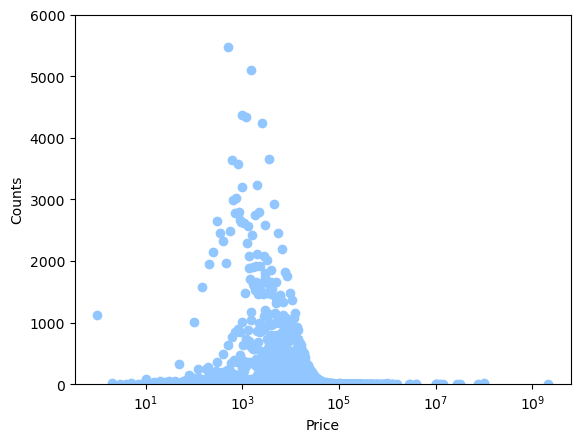

In [37]:
#Looking at the above data, it seemed that there are people listing their cars at prices that are not the selling price (e.g. $0, $2147483647)<br>
#I will remove listings that looks unrealistic.
count = ebay['price'].value_counts().rename_axis('price').reset_index(name='counts')
style.use('seaborn-pastel')
plt.scatter(count['price'],count['counts'])
plt.xscale('log')
plt.xlabel('Price')
plt.ylabel('Counts')
plt.ylim([0,6000])
plt.show()

In [38]:
#Based on scatter plot, most cars are sold for less than $100,000 (10^5). I will set that as upper limit for filter.
#I will set the lower limit to $100 (10^2).
ebay = ebay[ebay['price'].between(100,100000)]

<b>Analysis</b>

We will look at whether vehicle type, year of registration, gearbox, kilometer, fuel type, brand and damages will affect the pricing of the car

In [39]:
print(ebay.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343934 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date_crawled           343934 non-null  object
 1   name                   343934 non-null  object
 2   seller                 343934 non-null  object
 3   offer_type             343934 non-null  object
 4   price                  343934 non-null  int64 
 5   abtest                 343934 non-null  object
 6   vehicle_type           324839 non-null  object
 7   year_of_registration   343934 non-null  int64 
 8   gearbox                329040 non-null  object
 9   power_ps               343934 non-null  int64 
 10  model                  328117 non-null  object
 11  kilometer              343934 non-null  int64 
 12  month_of_registration  343934 non-null  int64 
 13  fuel_type              320465 non-null  object
 14  brand                  343934 non-null  object
 15  

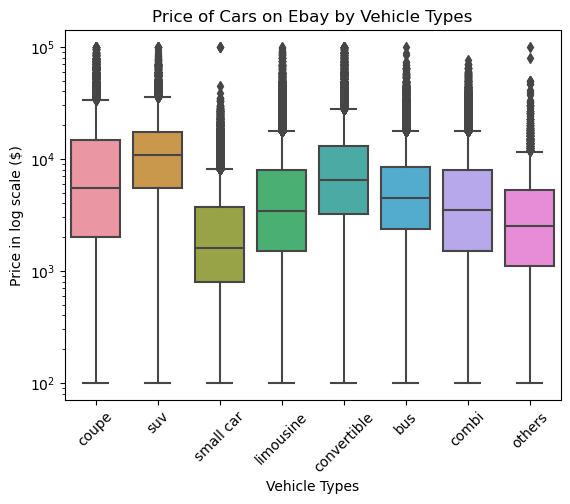

In [40]:
#Vehicle Type
sns.boxplot(y = 'price', x = 'vehicle_type',data=ebay)
plt.xticks(rotation = 45)
plt.xlabel('Vehicle Types')
plt.ylabel('Price in log scale ($)')
plt.title('Price of Cars on Ebay by Vehicle Types')
plt.yscale('log')
plt.show()

In [41]:
ebay.pivot_table(values='price', index = 'vehicle_type', aggfunc=[np.mean, np.median, np.min, np.max, 'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
vehicle_type,,,,,
bus,6728.675415,4500,100,99999,29681
combi,5840.252259,3500,100,75990,65845
convertible,10111.889925,6500,100,99999,22412
coupe,10413.433064,5500,100,100000,18219
limousine,5967.319727,3400,100,100000,93489
others,4378.253055,2500,100,99990,3110
small car,2814.621514,1600,100,100000,77625
suv,13221.425370,10800,100,100000,14458


From the boxplot, we can see that the data are positively skewed in all types of cars.<br>
In general, SUV are sold at a higher price than the rest while small car fetch the least.

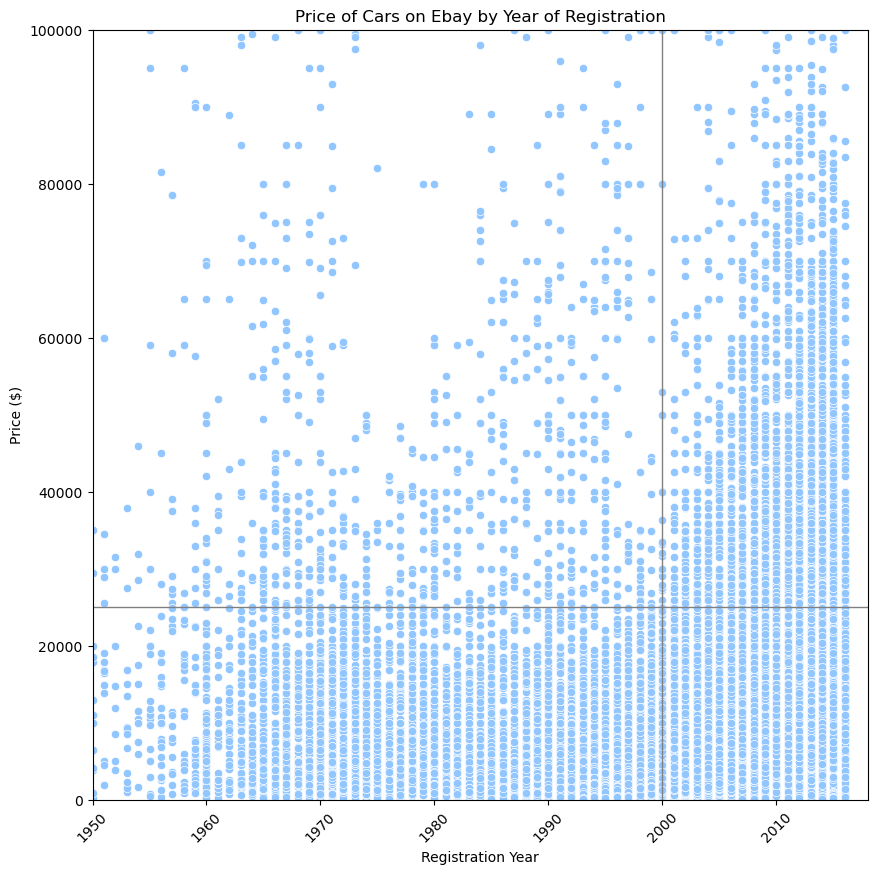

In [42]:
#Year of Registration
#I will get the x scale to begin at 1950 as there are not many data points before 1950 
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'price', x = 'year_of_registration',data=ebay)
plt.xticks(rotation = 45)
plt.xlabel('Registration Year')
plt.xticks([x for x in range(1900,2016,10)])
plt.xlim(1950,2018)
plt.ylim(0,100000)
plt.ylabel('Price ($)')
plt.title('Price of Cars on Ebay by Year of Registration')
plt.axvline(x=2000,linewidth=1, color='#808080', alpha=1)
plt.axhline(y=25000,linewidth=1, color='#808080', alpha=1)
plt.show()

From the scatter plot above, cars that are registered after year 2000 are more likely to sell for a higher price than cars that are registered between 1950 to 2000. 

In [43]:
#Gearbox
ebay.pivot_table(values='price', index = 'gearbox', aggfunc=[np.mean, np.median, np.min, np.max, 'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
gearbox,,,,,
auto,10569.306184,7150,100,100000,73410
manual,4712.143344,2700,100,100000,255630


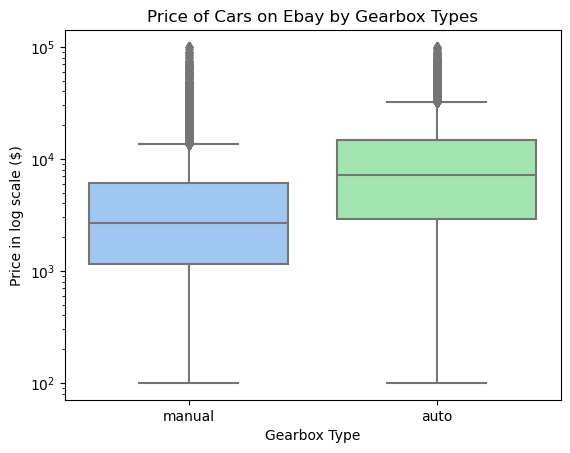

In [44]:
sns.boxplot(y = 'price', x = 'gearbox',data=ebay)
plt.xlabel('Gearbox Type')
plt.ylabel('Price in log scale ($)')
plt.title('Price of Cars on Ebay by Gearbox Types')
plt.yscale('log')
plt.show()

Based on the data above, automatic cars have a higher resale price than manual car.

In [45]:
ebay.pivot_table(values='price', index = ['gearbox','vehicle_type'], aggfunc=[np.mean, np.median, np.min, np.max, 'count'])

mean median  amin    amax  count
                             price  price price   price  price
gearbox vehicle_type                                          
auto    bus           10710.100348   7600   100   89000   4883
        combi          8972.419673   6600   100   75990  17435
        convertible   15401.118911  11225   150   99999   5584
        coupe         15033.959527  11909   100   98900   5831
        limousine      9830.460622   6800   100   98000  24430
        others         7753.451895   4500   100   50000    343
        small car      3964.958835   2350   100  100000   5976
        suv           16696.018758  13900   100   99000   7037
manual  bus            5953.476020   4250   100   85000  24041
        combi          4765.701079   2900   100   50000  46815
        convertible    8361.689553   5500   100   99999  16138
        coupe          8188.595807   3950   100  100000  11925
        limousine      4630.313537   2799   100  100000  66796
        others         4013.803101   2500   100   99990   2580
        small car      2747.547332   1550   100   45000  68653
        suv           10051.016751   8500   100   99999   7104

The pricing for each vehicle type are impacted by the gearbox type. All vehicle types see a decrease in mean and median pricing when compared between auto gearbox and manual gearbox.

In [46]:
#Mileage (kilometer)
ebay.pivot_table(values='price', index = 'kilometer', aggfunc=[np.mean, np.median, np.min, np.max,'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
kilometer,,,,,
5000,7348.148538,1990,100,100000,5029
10000,20437.331019,16900,100,95000,1728
20000,16526.608761,13500,100,99999,5296
30000,15610.821577,12499,100,99999,5756
40000,14882.663112,11900,100,99000,6189
50000,13273.639711,10490,100,99999,7333
60000,11847.575321,9000,100,99000,8404
70000,10858.668191,8300,100,99900,9403


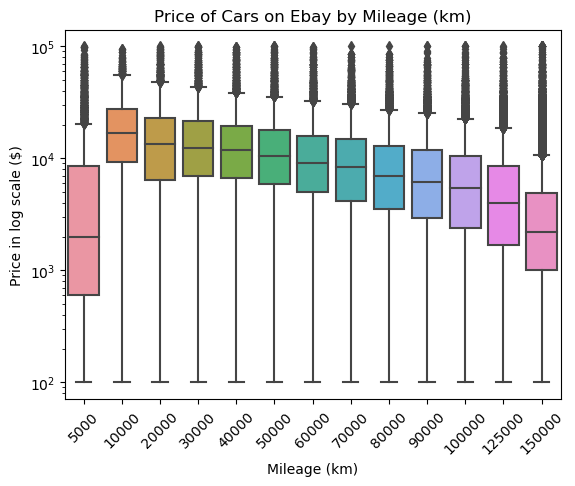

In [47]:
sns.boxplot(y = 'price', x = 'kilometer',data=ebay)
plt.xlabel('Mileage (km)')
plt.ylabel('Price in log scale ($)')
plt.xticks(rotation = 45)
plt.title('Price of Cars on Ebay by Mileage (km)')
plt.yscale('log')
plt.show()

Ignoring the cars with only 5000km mileage, average price decrease with increasing mileage. 

In [48]:
#Fuel Type
ebay.pivot_table(values='price', index = 'fuel_type', aggfunc=[np.mean, np.median, np.min, np.max,'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
fuel_type,,,,,
cng,4824.530841,3950,199,28856,535
diesel,8661.192020,6000,100,100000,103588
electric,12004.021053,5999,100,100000,95
gasoline,4888.201166,2400,100,100000,210756
hybrid,13260.521073,11799,129,62900,261
lpg,4459.023824,3000,100,39000,5079
others,4169.576159,1500,110,87000,151


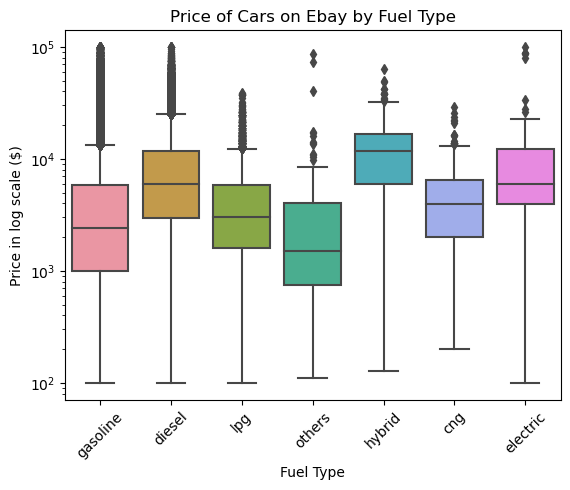

In [49]:
sns.boxplot(y = 'price', x = 'fuel_type',data=ebay)
plt.xlabel('Fuel Type')
plt.ylabel('Price in log scale ($)')
plt.xticks(rotation = 45)
plt.title('Price of Cars on Ebay by Fuel Type')
plt.yscale('log')
plt.show()

Hybird cars fetched the highest mean and median. Diesel and electric car fetched the next highest mean and median pricing. Looking at the count per fuel type, hybrid and electric cars are not being commonly sold on eBay. The most commonly sold cars have diesel or gasoline fuel type. Diesel car sells at a better price compared to gasoline cars, at almost double the mean and median price.

In [50]:
#Brand
print(ebay['brand'].value_counts())

volkswagen        72921
bmw               37830
opel              36550
mercedes_benz     33379
audi              30884
ford              23645
renault           16326
peugeot           10381
fiat               8837
seat               6432
skoda              5424
mazda              5307
smart              4947
citroen            4799
nissan             4683
toyota             4471
hyundai            3443
mini               3247
volvo              3155
sonstige_autos     3088
mitsubishi         2835
honda              2599
kia                2387
suzuki             2189
alfa_romeo         2165
porsche            1986
chevrolet          1735
chrysler           1325
dacia               863
jeep                755
land_rover          748
daihatsu            735
subaru              722
jaguar              587
saab                505
daewoo              500
trabant             465
lancia              443
rover               435
lada                206
Name: brand, dtype: int64


In [51]:
ebay.pivot_table(values='price', index = 'brand', aggfunc=[np.mean, np.median, np.min, np.max,'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
brand,,,,,
alfa_romeo,4335.155196,2499,100,73000,2165
audi,9089.312816,6000,100,99900,30884
bmw,8442.451599,5990,100,99999,37830
chevrolet,7142.379827,4700,100,90500,1735
chrysler,4164.927547,2450,100,37500,1325
citroen,3762.790373,2550,100,38888,4799
dacia,5936.552723,4950,120,19990,863
daewoo,1037.836000,999,100,3850,500


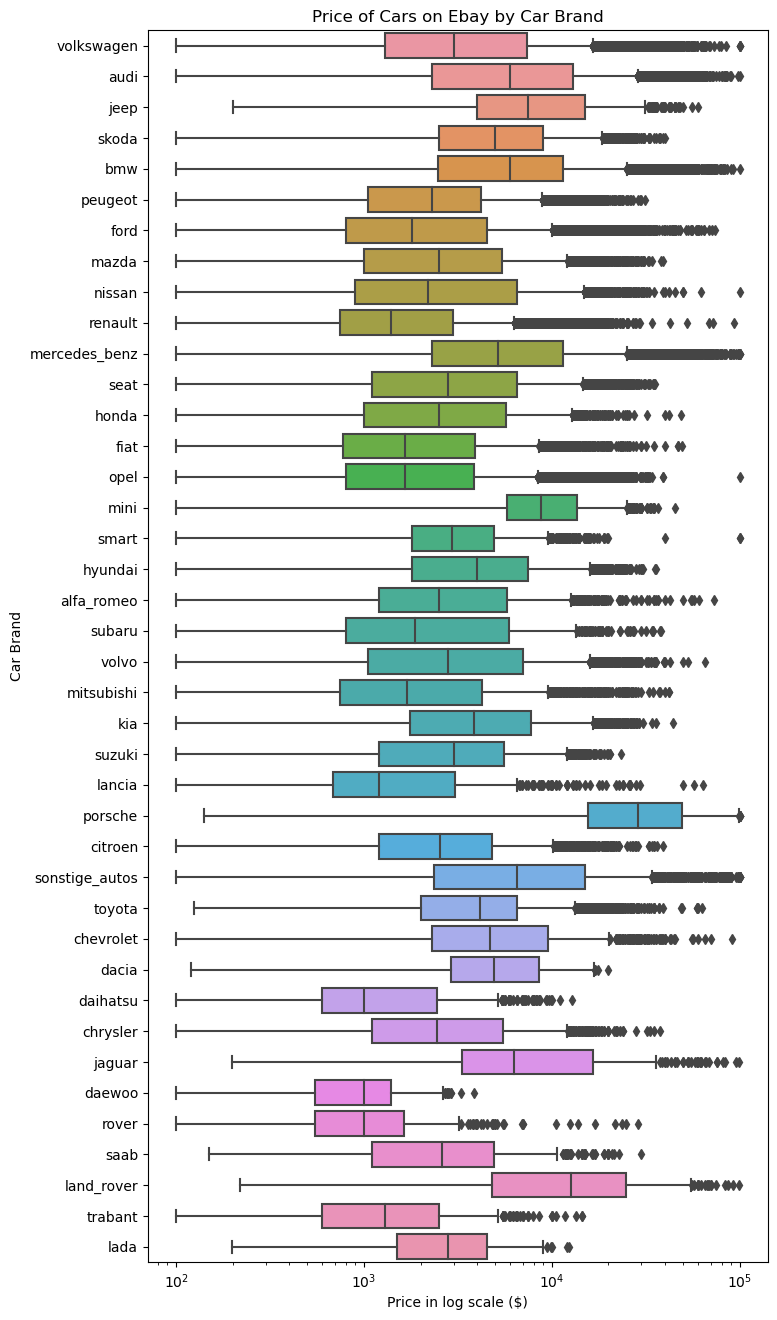

In [52]:
plt.figure(figsize=(8,16))
sns.boxplot(y = 'brand', x = 'price',data=ebay)
plt.ylabel('Car Brand')
plt.xlabel('Price in log scale ($)')
plt.title('Price of Cars on Ebay by Car Brand')
plt.xscale('log')
plt.show()

Porsche cars fetched the highest price compared to other car brands. However, it is not one of the more commonly sold car brands on eBay. Among the top 5 brands that are commonly sold on eBay, Audi and BMW gets a higher resale price, with Mercedes Benz coming close behind. 

In [53]:
#Damages
ebay.pivot_table(values='price', index = 'not_repaired_damage', aggfunc=[np.mean, np.median, np.min, np.max,'count'])

,mean,median,amin,amax,count
,price,price,price,price,price
not_repaired_damage,,,,,
False,6998.308279,4200,100,100000,252057
True,2262.889651,1000,100,100000,32642


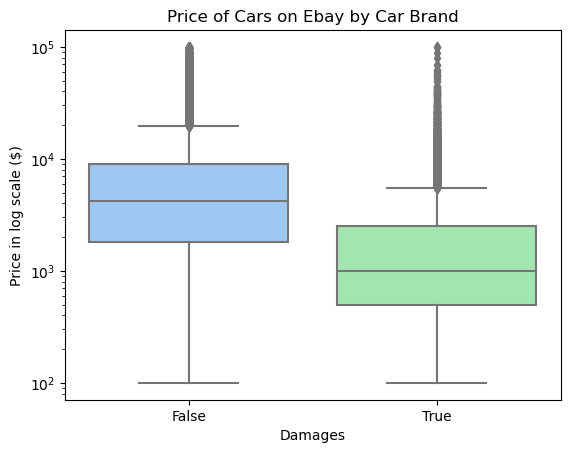

In [54]:
sns.boxplot(y = 'price', x = 'not_repaired_damage',data=ebay)
plt.xlabel('Damages')
plt.ylabel('Price in log scale ($)')
plt.title('Price of Cars on Ebay by Car Brand')
plt.yscale('log')
plt.show()

It is logical that cars with unrepaired damages will sell at a lower price. Based on the data above, cars with no unrepaired damages on average sells for 3 times the price of a damaged car. From the median price, cars with no unrepaired damages sells at 4 times the price of a damaged car.